<a href="https://colab.research.google.com/github/gstripling00/introduction_to_neural_networks/blob/Notebooks/Simple_Neural_Network_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network using Keras


## Introduction 
I created a prediction model for sales analysis. In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales. For designing the model, the machine learning method I opted for is simple linear regression, and the programming was done in Jupyter notebook.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

### Import Libraries

In [1]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   
import sklearn

##Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Keras specific
import keras


###  Load the Dataset

You will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [2]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/gstripling00/introduction_to_neural_networks/blob/Datasets/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [3]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [4]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [5]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [6]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
#check there are any NAN values
advertising_df.isnull().values.any()

False

In [8]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

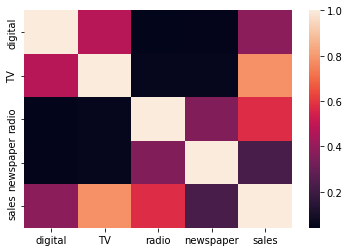

In [9]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr()) 

<Axes: >

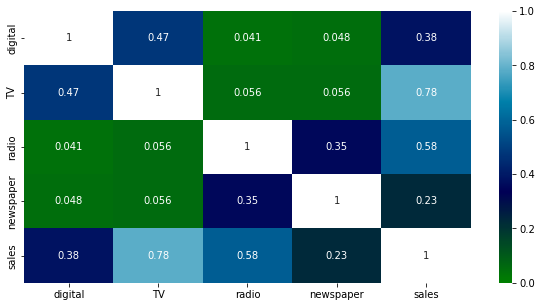

In [10]:
## Another option is to plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


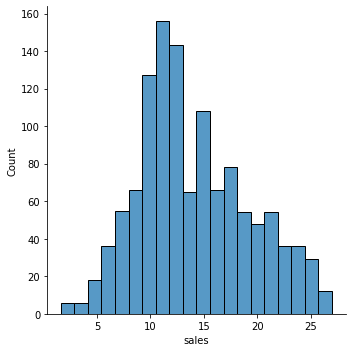

In [11]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])

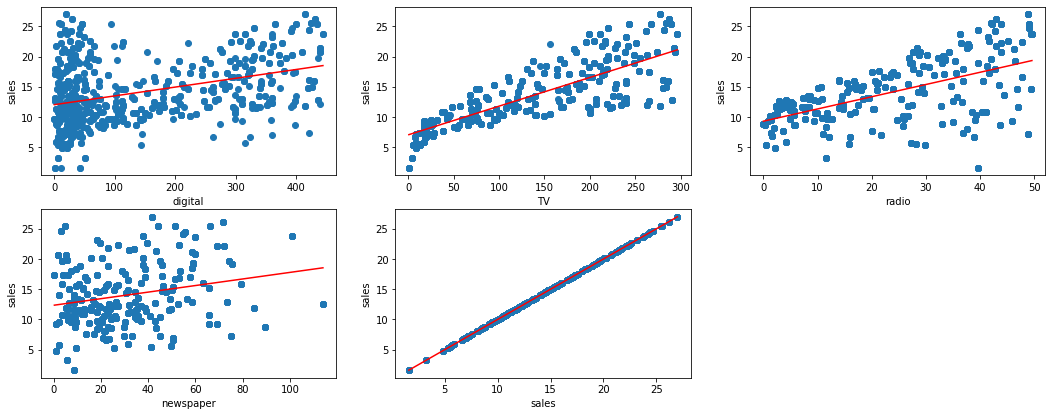

In [12]:
'''=== Show the linear relationship between features  and price. Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label
    

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

### X (features) and y (target) arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [13]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

## Train - Test - Split

Now let's split the data into a training, validation, and test set XXXXXXXXx



In [14]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Now, we need to output the split files. We will specifically need the test.csv later for testing. You should see the files appear in the home directory under sample data.

In [16]:
X_train.to_csv('/content/sample_data/adv-train.csv', encoding='utf-8', index=False)

In [17]:
X_test.to_csv('/content/sample_data/adv-test.csv', encoding='utf-8', index=False)

In [18]:
## Build the model
model = Sequential()
model.add(Dense(4,activation='relu')) 
model.add(Dense(3,activation='relu'))
model.add(Dense(1))


## Compile the Model Compilation - Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments
# for a mean squared error regression problem

#model.compile(loss= "mean_squared_error" , 
              #optimizer="adam", 
              #metrics=["mean_squared_error"])

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
#model.summary()

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 32
)

Epoch 1/150
23/23 [==============================] - 1s 15ms/step - loss: 74.8497 - mae: 7.5493 - val_loss: 63.7178 - val_mae: 7.0512
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 49.3231 - mae: 6.1127 - val_loss: 45.2596 - val_mae: 5.8634
Epoch 3/150
23/23 [==============================] - 0s 8ms/step - loss: 37.0925 - mae: 5.1859 - val_loss: 36.1786 - val_mae: 5.1136
Epoch 4/150
23/23 [==============================] - 0s 8ms/step - loss: 30.7668 - mae: 4.6407 - val_loss: 31.6010 - val_mae: 4.7075
Epoch 5/150
23/23 [==============================] - 0s 7ms/step - loss: 27.2615 - mae: 4.3347 - val_loss: 28.6364 - val_mae: 4.4501
Epoch 6/150
23/23 [==============================] - 0s 8ms/step - loss: 24.8632 - mae: 4.1118 - val_loss: 26.3680 - val_mae: 4.2398
Epoch 7/150
23/23 [==============================] - 0s 8ms/step - loss: 23.0685 - mae: 3.9542 - val_loss: 24.5517 - val_mae: 4.0925
Epoch 8/150
23/23 [==============================] - 0s 10ms/step - 

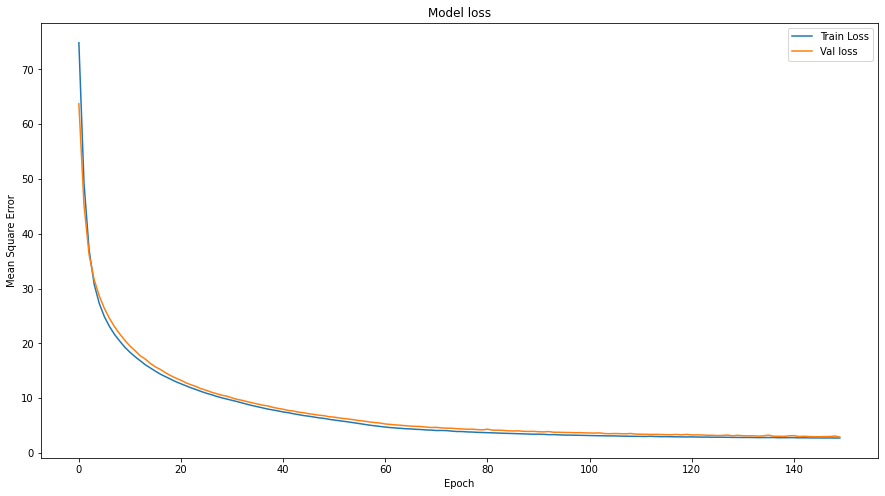

In [19]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

## TALK ABOUT CONVERGENCE

In [20]:
# Use matplotlib to draw the model's loss curves for training and validation
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  

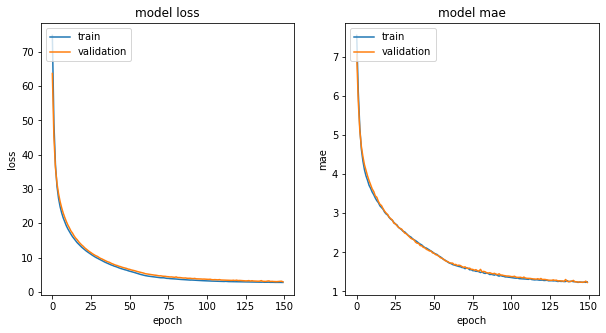

In [24]:
plot_curves(history, ['loss', 'mae'])

In [31]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

15/15 [==============================] - 0s 3ms/step - loss: 2.9353 - mae: 1.2301
loss value:  2.9352686405181885
Mean absolute error:  1.2300933599472046


In [33]:
'''=== predict the SALES =='''

# predict SALES using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 5ms/step
[24.242981  17.615545  15.180934  21.073256  17.748863  23.687344
 11.46493   20.175665  18.795527  14.778589   6.939116  16.44095
  7.3442397  8.21145   11.511036   7.6814475 21.075594  14.529778
  4.5014253 17.682878  23.896791   7.1654    11.686294  12.362489
  9.634967   4.5212765 15.800166  18.197998  12.865475   9.782003
 14.728499  16.035858  20.360146  16.09847    8.7966175  8.8001795
 25.399445  15.092475  13.894523  16.028824  13.950454  15.129639
  8.282825  15.015562  15.558661  14.436098   6.7644053 25.399445
 13.532619  10.006586   8.81809   11.511036  11.758756  16.246264
  4.9512334 18.256573  16.134172  20.630358   9.018981  14.186756
 11.826313  11.163275  11.36517   14.352826   8.90522   11.656869
 10.375013  22.536224   7.527002  21.643042   6.8142858 23.045895
  8.749332  19.903223  12.606467  16.622845  17.214735  12.989614
 16.035858  19.710693  16.799067  19.647053  16.532333  17.618595
 14.729345  13.533946  

In [35]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,26.2,24.242981
1,19.0,17.615545
2,12.8,15.180934
3,20.8,21.073256
4,16.9,17.748863
5,23.8,23.687344
6,9.3,11.464930
7,22.6,20.175665
8,18.9,18.795527
9,14.9,14.778589


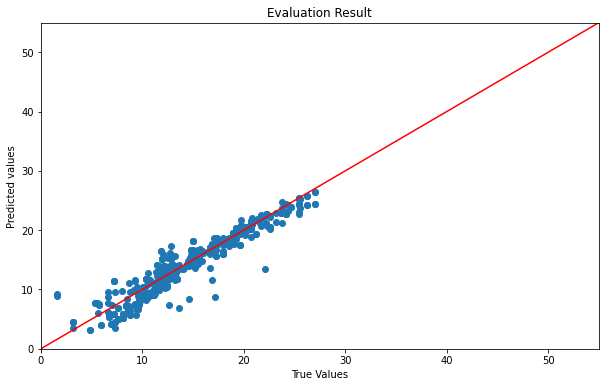

In [37]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

<Axes: xlabel='sales'>

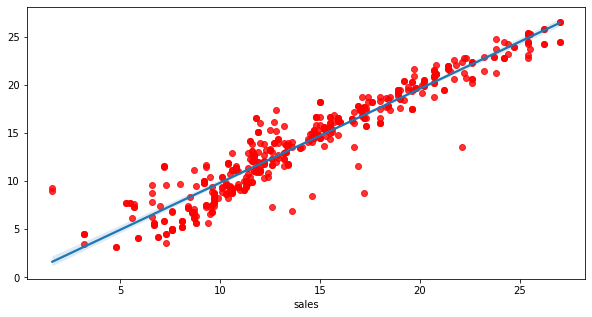

In [46]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [42]:
# Importing metrics from sklearn
from sklearn import metrics

# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 1.2300932846466701
MSE: 2.935268557986242
RMSE: 1.7132625478852452


In [28]:
diff = pd.Dataframe({'Actual':Y_test, 'Predicted': Y_pred})

AttributeError: ignored

In [ ]:
#Note that after 32 Epochs we could have "stopped early" rather than go ghrough 150 eochs since the
#numbers are so close MSE is around $163K.

In [ ]:
## Build the model
model = Sequential()
model.add(Dense(32, input_dim=4, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1, activation='linear', name='sales'))


## Compile the Model
model.compile(loss= "mean_squared_error" , 
              optimizer="adam", 
              metrics=["mean_squared_error"])


## Fit the Model

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data = (X_test, y_test))

#train model and perform validation test




In [ ]:
#Let's show loss as Mean Square Error (MSE)
loss, mse = model.evaluate(X_train)

print("Mean Squared Error", mse)

In [ ]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

## TALK ABOUT CONVERGENCE


In [ ]:
# Use matplotlib to draw the model's loss curves for training and validation
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  


In [ ]:
plot_curves(history, ['loss', 'mse'])

In [29]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

NameError: ignored

In [30]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


15/15 [==============================] - 0s 2ms/step - loss: 2.9353 - mae: 1.2301
loss value:  2.9352686405181885
Mean absolute error:  1.2300933599472046


In [32]:
'''=== predict the SALES =='''

# predict SALES using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 2ms/step
[24.242981  17.615545  15.180934  21.073256  17.748863  23.687344
 11.46493   20.175665  18.795527  14.778589   6.939116  16.44095
  7.3442397  8.21145   11.511036   7.6814475 21.075594  14.529778
  4.5014253 17.682878  23.896791   7.1654    11.686294  12.362489
  9.634967   4.5212765 15.800166  18.197998  12.865475   9.782003
 14.728499  16.035858  20.360146  16.09847    8.7966175  8.8001795
 25.399445  15.092475  13.894523  16.028824  13.950454  15.129639
  8.282825  15.015562  15.558661  14.436098   6.7644053 25.399445
 13.532619  10.006586   8.81809   11.511036  11.758756  16.246264
  4.9512334 18.256573  16.134172  20.630358   9.018981  14.186756
 11.826313  11.163275  11.36517   14.352826   8.90522   11.656869
 10.375013  22.536224   7.527002  21.643042   6.8142858 23.045895
  8.749332  19.903223  12.606467  16.622845  17.214735  12.989614
 16.035858  19.710693  16.799067  19.647053  16.532333  17.618595
 14.729345  13.533946  

In [45]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(100)

,True Value,Predicted Value
0,26.2,24.242981
1,19.0,17.615545
2,12.8,15.180934
3,20.8,21.073256
4,16.9,17.748863
...,...,...
95,20.2,20.265512
96,8.8,5.623824
97,20.8,21.073256
98,25.4,24.216173


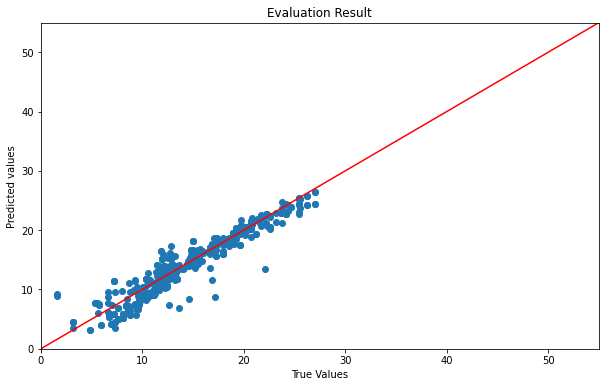

In [36]:
# visualize the prediction using diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

<Axes: xlabel='sales'>

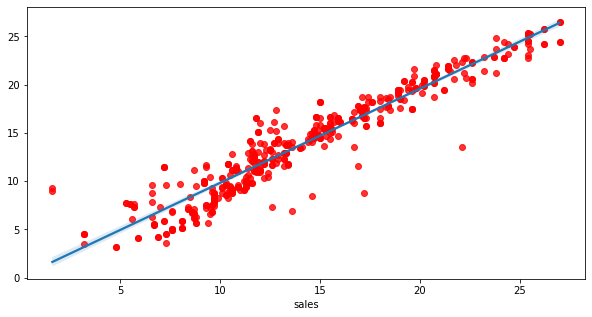

In [44]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})


In [ ]:
## EVALUATE



NOTHING PAST HERE

## Creating and Training the Model

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how you can interpret them.

**Residual Histogram**

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [40]:
# Importing metrics from sklearn
from sklearn import metrics

In [41]:
# Importing metrics from sklearn
from sklearn import metrics

# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 1.2300932846466701
MSE: 2.935268557986242
RMSE: 1.7132625478852452
